# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 
# To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities. 
# Your first requirement is to create a series of scatter plots to showcase the following relationships:

#     Temperature (C) vs. Latitude
#     Humidity (%) vs. Latitude
#     Cloudiness (%) vs. Latitude
#     Wind Speed (kph) vs. Latitude

# After each plot add a sentence or too explaining what the code is and analyzing. Your second requirement is to run linear regression on each relationship, 
# only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#     Northern Hemisphere - Temperature (C) vs. Latitude
#     Southern Hemisphere - Temperature (C) vs. Latitude
#     Northern Hemisphere - Humidity (%) vs. Latitude
#     Southern Hemisphere - Humidity (%) vs. Latitude
#     Northern Hemisphere - Cloudiness (%) vs. Latitude
#     Southern Hemisphere - Cloudiness (%) vs. Latitude
#     Northern Hemisphere - Wind Speed (kph) vs. Latitude
#     Southern Hemisphere - Wind Speed (kph) vs. Latitude

# After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

# Your final notebook must:

#     Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#     Perform a weather check on each of the cities using a series of successive API calls.
#     Include a print log of each city as it's being processed with the city number and city name.
#     Save a CSV of all retrieved data and a PNG image for each scatter plot.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import scipy.stats as st
from citipy import citipy
import time

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "../output_data/carlys_cities.csv"

## Generate Cities List

In [2]:
# Generating the random list of latitudes and longitudes:
# Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. 
# The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.

lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# Create empty lists to store values for the city names and the coordinates
lat_lngs = []
cities = []

# Create a set of random latitudes and longitudes combos
# note that the size is significantly higher than the number of cities we need,
# this is because with the random lat & lng combos, lots will not be anywhere near a city.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)
lat_lngs = zip(lats, lngs)

# Select nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, add it to the list
    if city not in cities:
        cities.append(city)

# Print the city count to check we have a minimum of 500 cities
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.

In [9]:
# template from weather stats API class 2 activity 7 notebook

# Build the query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units="+"metric"+"&q="

# Create empty lists to store values returned by the API call
name_of_city = []
latitude = []
longitude = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date_time = []


# Credit: found this trick to break up the API call on stackoverflow - 
# including letting the API rest for 5 seconds every 50 rows it loops through.

# Variables for item (individual city) and city_set (50 records per set)
item = 1
city_set = 1

# Loop through cities in the cities list
for city in cities:

    # for items 1 through 50
    if item < 50:
        try:
            response = requests.get(query_url + city).json()
            # Each city processed will get an item number, even if it is not found.
            print(f"Processing {city} Number {item} in Set {city_set}.")
            item = item + 1
            # Append relevant information to the correct list
            name_of_city.append(response['name'])
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date_time.append(response['dt'])
                    
        except:
            print(f"{city} not found. Skipping.")
    
    else:
        # Reset the item count
        item = 1
        # add one to the city_set count
        city_set = city_set + 1
        # pause API pull for 5 seconds and then continue
        time.sleep(5)

Processing punta arenas Number 1 in Set 1.
Processing chuy Number 2 in Set 1.
Processing suffolk Number 3 in Set 1.
Processing puerto escondido Number 4 in Set 1.
Processing yellowknife Number 5 in Set 1.
Processing mys shmidta Number 6 in Set 1.
mys shmidta not found. Skipping.
Processing grindavik Number 7 in Set 1.
Processing paamiut Number 8 in Set 1.
Processing alofi Number 9 in Set 1.
Processing barrow Number 10 in Set 1.
Processing napanee Number 11 in Set 1.
Processing namibe Number 12 in Set 1.
Processing hilo Number 13 in Set 1.
Processing ushuaia Number 14 in Set 1.
Processing bredasdorp Number 15 in Set 1.
Processing huejuquilla el alto Number 16 in Set 1.
Processing hofn Number 17 in Set 1.
Processing kahului Number 18 in Set 1.
Processing tautira Number 19 in Set 1.
Processing ambon Number 20 in Set 1.
Processing atuona Number 21 in Set 1.
Processing ust-nera Number 22 in Set 1.
Processing morehead Number 23 in Set 1.
Processing mataura Number 24 in Set 1.
Processing jame

In [10]:
# Create the dataframe with all city & weather data
# check it has at least 500 cities. 

city_weather_df = pd.DataFrame({"City Name":name_of_city,
                                "Country": country,
                                "Latitude": latitude,
                                "Longitude": longitude,
                                "Maximum Temperature (d/c)": max_temp,
                                "Humidity (%)": humidity,
                                "Cloudiness (%)": clouds,
                                "Wind Speed (km/h)": wind,
                                "Date": date_time})
city_weather_df

,City Name,Country,Latitude,Longitude,Maximum Temperature (d/c),Humidity (%),Cloudiness (%),Wind Speed (km/h),Date
0,Punta Arenas,CL,-53.1500,-70.9167,1.06,86,20,2.06,1651841108
1,Chui,UY,-33.6971,-53.4616,16.19,67,0,2.31,1651841108
2,Suffolk,US,40.8668,-72.7996,13.95,88,100,2.57,1651841108
3,Puerto Escondido,MX,15.8500,-97.0667,23.46,83,0,3.09,1651841109
4,Yellowknife,CA,62.4560,-114.3525,6.29,70,75,3.60,1651841109
...,...,...,...,...,...,...,...,...,...
511,Mugeni,RO,46.2500,25.2167,20.20,43,9,2.08,1651841354
512,Weymouth,US,42.2209,-70.9398,15.02,54,100,2.06,1651841355
513,Mt. Pleasant,US,32.7941,-79.8626,26.14,80,0,3.60,1651841355
514,Ambulu,ID,-8.3450,113.6058,25.50,91,45,1.68,1651841355


### Convert Raw Data to DataFrame
* Export the city data into a .csv.

In [21]:
# Save the city_weather_df dataframe as a CSV
city_weather_df.to_csv(output_data_file)
city_weather_df

,City Name,Country,Latitude,Longitude,Maximum Temperature (d/c),Humidity (%),Cloudiness (%),Wind Speed (km/h),Date
0,Punta Arenas,CL,-53.1500,-70.9167,1.06,86,20,2.06,1651841108
1,Chui,UY,-33.6971,-53.4616,16.19,67,0,2.31,1651841108
2,Suffolk,US,40.8668,-72.7996,13.95,88,100,2.57,1651841108
3,Puerto Escondido,MX,15.8500,-97.0667,23.46,83,0,3.09,1651841109
4,Yellowknife,CA,62.4560,-114.3525,6.29,70,75,3.60,1651841109
...,...,...,...,...,...,...,...,...,...
511,Mugeni,RO,46.2500,25.2167,20.20,43,9,2.08,1651841354
512,Weymouth,US,42.2209,-70.9398,15.02,54,100,2.06,1651841355
513,Mt. Pleasant,US,32.7941,-79.8626,26.14,80,0,3.60,1651841355
514,Ambulu,ID,-8.3450,113.6058,25.50,91,45,1.68,1651841355


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
city_weather_df = city_weather_df[city_weather_df["Humidity (%)"] <=100]
city_weather_df

,City Name,Country,Latitude,Longitude,Maximum Temperature (d/c),Humidity (%),Cloudiness (%),Wind Speed (km/h),Date
0,Punta Arenas,CL,-53.1500,-70.9167,1.06,86,20,2.06,1651841108
1,Chui,UY,-33.6971,-53.4616,16.19,67,0,2.31,1651841108
2,Suffolk,US,40.8668,-72.7996,13.95,88,100,2.57,1651841108
3,Puerto Escondido,MX,15.8500,-97.0667,23.46,83,0,3.09,1651841109
4,Yellowknife,CA,62.4560,-114.3525,6.29,70,75,3.60,1651841109
...,...,...,...,...,...,...,...,...,...
511,Mugeni,RO,46.2500,25.2167,20.20,43,9,2.08,1651841354
512,Weymouth,US,42.2209,-70.9398,15.02,54,100,2.06,1651841355
513,Mt. Pleasant,US,32.7941,-79.8626,26.14,80,0,3.60,1651841355
514,Ambulu,ID,-8.3450,113.6058,25.50,91,45,1.68,1651841355


In [23]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df[city_weather_df["Humidity (%)"] > 100].index

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs Max Temp')

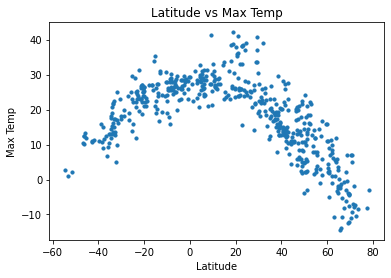

In [25]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Maximum Temperature (d/c)"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs Humidity')

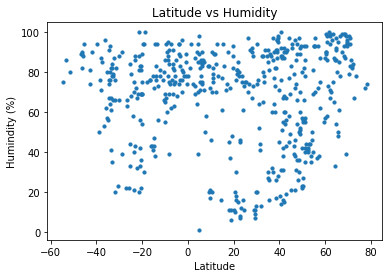

In [26]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity (%)"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Humindity (%)")
plt.title("Latitude vs Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs Cloudiness')

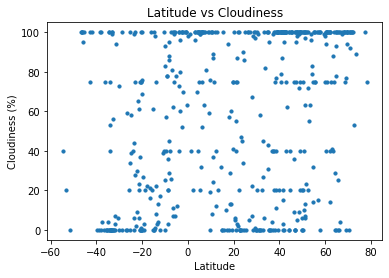

In [27]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness (%)"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs Wind Speed')

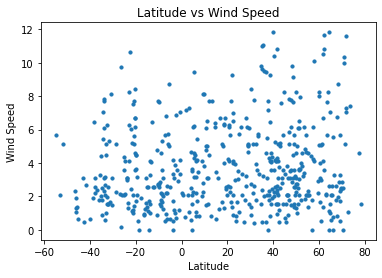

In [28]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed (km/h)"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

## Linear Regression

In [29]:
# start by creating new dataframe for northern hemisphere, when the latitude is a positive number
north_hemisphere_df = city_weather_df.loc[city_weather_df["Latitude"] >= 0]
north_hemisphere_df

,City Name,Country,Latitude,Longitude,Maximum Temperature (d/c),Humidity (%),Cloudiness (%),Wind Speed (km/h),Date
2,Suffolk,US,40.8668,-72.7996,13.95,88,100,2.57,1651841108
3,Puerto Escondido,MX,15.8500,-97.0667,23.46,83,0,3.09,1651841109
4,Yellowknife,CA,62.4560,-114.3525,6.29,70,75,3.60,1651841109
5,Grindavik,IS,63.8424,-22.4338,4.97,65,75,8.23,1651841110
6,Paamiut,GL,61.9940,-49.6678,1.11,99,100,1.37,1651841110
...,...,...,...,...,...,...,...,...,...
509,Tiksi,RU,71.6872,128.8694,-1.97,82,100,7.32,1651841305
510,Kenai,US,60.5544,-151.2583,4.49,90,100,3.09,1651841354
511,Mugeni,RO,46.2500,25.2167,20.20,43,9,2.08,1651841354
512,Weymouth,US,42.2209,-70.9398,15.02,54,100,2.06,1651841355


In [30]:
# start by creating new dataframe for southern hemisphere, when the latitude is a negative number
south_hemisphere_df = city_weather_df.loc[city_weather_df["Latitude"] <= 0]
south_hemisphere_df

,City Name,Country,Latitude,Longitude,Maximum Temperature (d/c),Humidity (%),Cloudiness (%),Wind Speed (km/h),Date
0,Punta Arenas,CL,-53.1500,-70.9167,1.06,86,20,2.06,1651841108
1,Chui,UY,-33.6971,-53.4616,16.19,67,0,2.31,1651841108
7,Alofi,NU,-19.0595,-169.9187,20.94,94,0,0.51,1651841110
10,Mossamedes,AO,-15.1961,12.1522,35.35,41,0,2.57,1651841111
12,Ushuaia,AR,-54.8000,-68.3000,2.81,75,40,5.66,1651841112
...,...,...,...,...,...,...,...,...,...
502,Henties Bay,NA,-22.1160,14.2845,19.68,67,9,6.05,1651841352
505,Chimbote,PE,-9.0853,-78.5783,17.97,90,78,2.21,1651841353
507,Madang,PG,-5.2246,145.7966,26.22,86,78,0.65,1651841353
514,Ambulu,ID,-8.3450,113.6058,25.50,91,45,1.68,1651841355


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
correlation=round(st.pearsonr(north_hemisphere_df['Latitude'],north_hemisphere_df['Maximum Temperature (d/c)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Latitude'],north_hemisphere_df['Maximum Temperature (d/c)'])
model

The correlation coefficient is -0.84


LinregressResult(slope=-0.5188506363473783, intercept=36.36990267147958, rvalue=-0.8439006805715747, pvalue=2.5545666647340997e-95, stderr=0.01775868223097977)

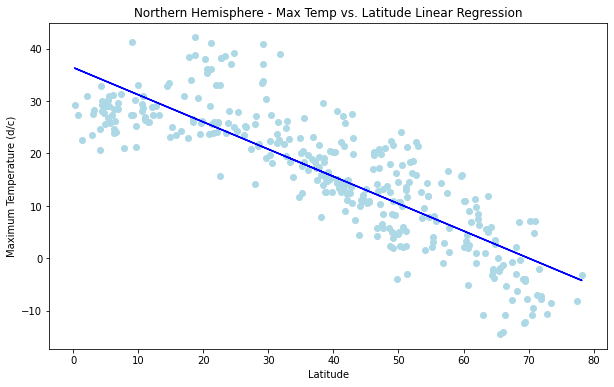

In [35]:
slope = -0.5188506363473783
intercept = 36.36990267147958

y_axis = north_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Latitude'],north_hemisphere_df['Maximum Temperature (d/c)'], color='lightblue')
plt.plot(north_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (d/c)');
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
correlation=round(st.pearsonr(south_hemisphere_df['Latitude'],south_hemisphere_df['Maximum Temperature (d/c)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Latitude'],south_hemisphere_df['Maximum Temperature (d/c)'])
model

The correlation coefficient is 0.8


LinregressResult(slope=0.4134912754013811, intercept=30.141007184811397, rvalue=0.7958409646922245, pvalue=3.1723139367154433e-38, stderr=0.024344455440449924)

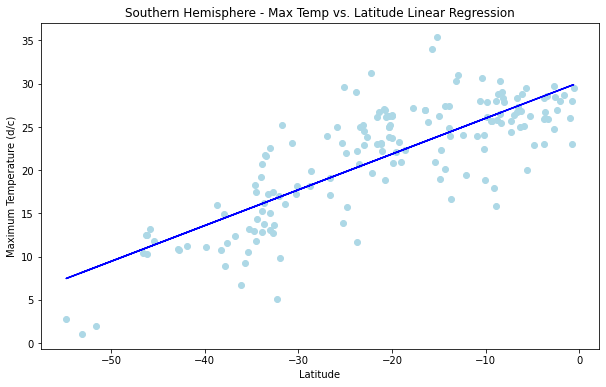

In [33]:
slope = 0.4134912754013811
intercept = intercept=30.141007184811397

y_axis = south_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Latitude'],south_hemisphere_df['Maximum Temperature (d/c)'], color='lightblue')
plt.plot(south_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (d/c)');
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [36]:
correlation=round(st.pearsonr(north_hemisphere_df['Latitude'],north_hemisphere_df['Humidity (%)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Latitude'],north_hemisphere_df['Humidity (%)'])
model

The correlation coefficient is 0.14


LinregressResult(slope=0.19556123000433018, intercept=58.49063427228677, rvalue=0.14498228030565655, pvalue=0.006824613263368372, stderr=0.0718530531847166)

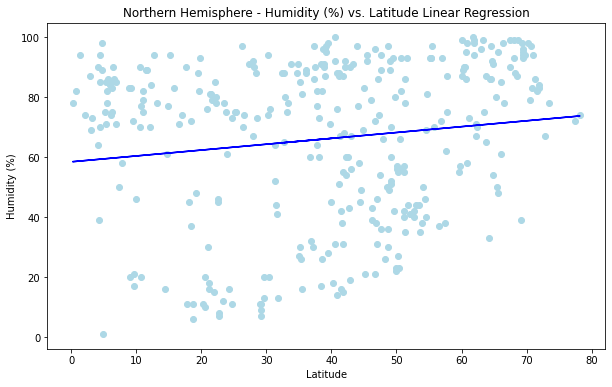

In [37]:
slope = 0.19556123000433018
intercept = 58.49063427228677

y_axis = north_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Latitude'],north_hemisphere_df['Humidity (%)'], color='lightblue')
plt.plot(north_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)');
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [38]:
correlation=round(st.pearsonr(south_hemisphere_df['Latitude'],south_hemisphere_df['Humidity (%)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Latitude'],south_hemisphere_df['Humidity (%)'])
model

The correlation coefficient is 0.06


LinregressResult(slope=0.09414188233969258, intercept=73.30689854533215, rvalue=0.06399138547582149, pvalue=0.4084856251995066, stderr=0.11360883533108714)

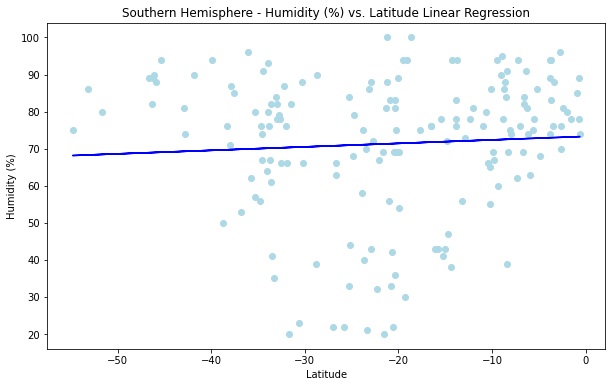

In [39]:
slope = 0.09414188233969258
intercept = 73.30689854533215

y_axis = south_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Latitude'],south_hemisphere_df['Humidity (%)'], color='lightblue')
plt.plot(south_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)');
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [40]:
correlation=round(st.pearsonr(north_hemisphere_df['Latitude'],north_hemisphere_df['Cloudiness (%)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Latitude'],north_hemisphere_df['Cloudiness (%)'])
model

The correlation coefficient is 0.13


LinregressResult(slope=0.2690565537793233, intercept=53.41803616079143, rvalue=0.13190199953157045, pvalue=0.013934445998015368, stderr=0.10886077956341299)

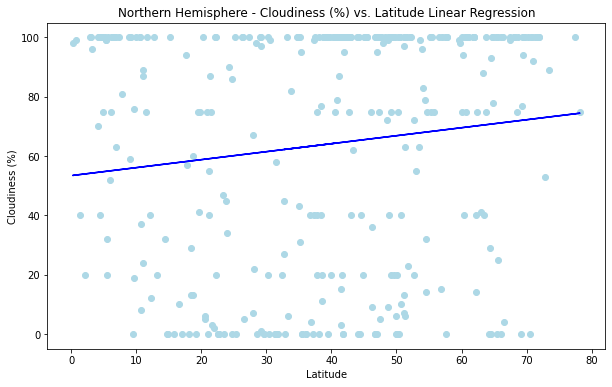

In [41]:
slope = 0.2690565537793233
intercept = 53.41803616079143

y_axis = north_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Latitude'],north_hemisphere_df['Cloudiness (%)'], color='lightblue')
plt.plot(north_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)');
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [42]:
correlation=round(st.pearsonr(south_hemisphere_df['Latitude'],south_hemisphere_df['Cloudiness (%)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Latitude'],south_hemisphere_df['Cloudiness (%)'])
model

The correlation coefficient is 0.16


LinregressResult(slope=0.5038996954303144, intercept=56.50908683266606, rvalue=0.16273419955545435, pvalue=0.03451903483276911, stderr=0.2364171227253211)

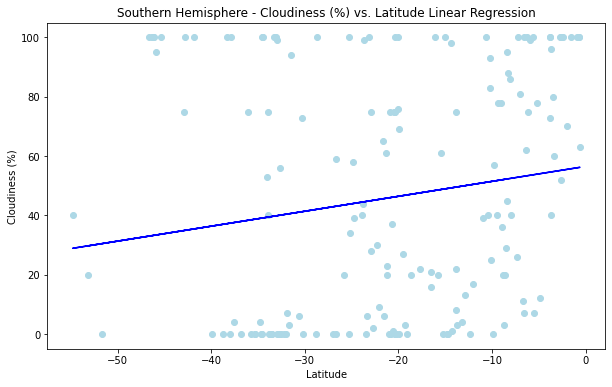

In [43]:
slope = 0.5038996954303144
intercept = 56.50908683266606

y_axis = south_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Latitude'],south_hemisphere_df['Cloudiness (%)'], color='lightblue')
plt.plot(south_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)');
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

In [44]:
correlation=round(st.pearsonr(north_hemisphere_df['Latitude'],north_hemisphere_df['Wind Speed (km/h)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Latitude'],north_hemisphere_df['Wind Speed (km/h)'])
model

The correlation coefficient is 0.05


LinregressResult(slope=0.006017308778730685, intercept=3.742029035959255, rvalue=0.04519628778680113, pvalue=0.4012983696860777, stderr=0.0071605431100639555)

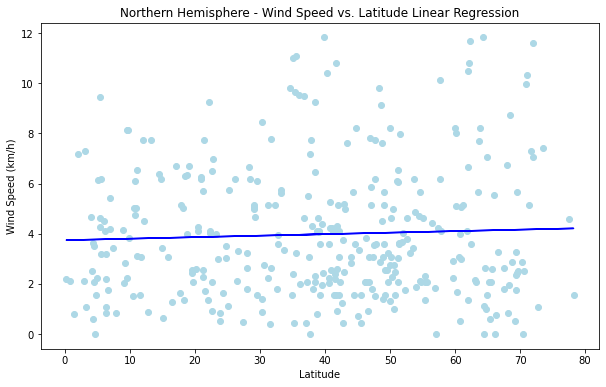

In [45]:
slope = 0.006017308778730685
intercept = 3.742029035959255

y_axis = north_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Latitude'],north_hemisphere_df['Wind Speed (km/h)'], color='lightblue')
plt.plot(north_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)');
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

In [46]:
correlation=round(st.pearsonr(south_hemisphere_df['Latitude'],south_hemisphere_df['Wind Speed (km/h)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Latitude'],south_hemisphere_df['Wind Speed (km/h)'])
model

The correlation coefficient is -0.0


LinregressResult(slope=-0.00023791808989418085, intercept=3.23772925769196, rvalue=-0.0013849593121731385, pvalue=0.9857418799680098, stderr=0.013293269138916599)

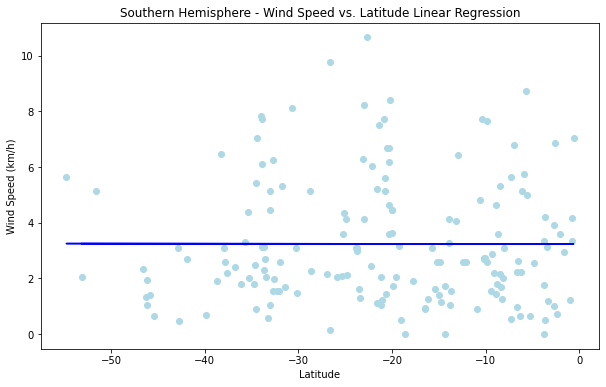

In [47]:
slope = -0.00023791808989418085
intercept = 3.23772925769196

y_axis = south_hemisphere_df['Latitude']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Latitude'],south_hemisphere_df['Wind Speed (km/h)'], color='lightblue')
plt.plot(south_hemisphere_df['Latitude'],y_axis,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)');
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()